![Banner](./img/AI_Special_Program_Banner.jpg)
 

# An ML library for Python - First contact
---

For many tasks that we want to solve using [machine learning](https://de.wikipedia.org/wiki/Maschinelles_Lernen), we will use the package [`scikit-learn`](http://scikit-learn.org/), which provides numerous methods. This is a very basic introduction to the *Fit-Predict* paradigm. This refers to the *fit* of a model to existing data and the subsequent use of the model for the *prediction* of the model response for new data. This is also the first time we come into contact with `scikit-learn`.

> The presentation follows the book [IPython Cookbook](http://ipython-books.github.io/)


## Table of contents
---

- [Basics of scikit-learn](#Basics-of-scikit-learn)
- [The most important in brief](#The-most-important-in-brief)

## Basics of scikit-learn
---

As an introduction, we will use *linear regression* to find an interpolation function that fits slightly noisy data and thus learn how to use `scikit-learn` in principle. The method of linear regression itself belongs to the group of *supervised learning*.

First, we import what we need again.

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

The following exponential function $e^{3x}$ is to form the basis of our data. We use this function under the generic name $f$.

In [2]:
def f(x):
    return np.exp(3 * x)

We generate function values in the interval $[0, 2]$.

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In the interval $[0, 1]$ we now generate data points using the function $f$ and Gaussian noise.

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
# random, but with seed to get reproducible results
np.random.seed(17)
y = f(x) + np.random.randn(len(x))
# to always achieve exactly the same results:
# y = np.array([1.27626589,-0.50476927,2.44601991,5.62700036,12.06036685,16.76637065,19.97383863])
y

array([ 1.27626589, -0.50476927,  2.44601991,  5.62700036, 12.06036685,
       16.76637065, 19.97383863])

Let's take a look at this (the actual function curve dashed, the data points with a large radius; explanation of the plot parameters as always using `plt.plot`). Note that the data points would look different for everyone if they contained a *random component* (i.e. if they had been generated with <tt>np.random</tt> WITHOUT <tt>seed</tt>)!

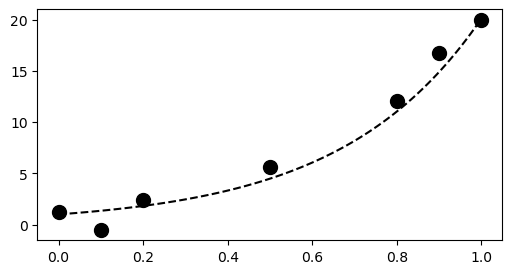

In [5]:
plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

We will now try a [linear interpolation](https://de.wikipedia.org/wiki/Interpolation_(mathematics)) with `scikit-learn`, which is also called *linear regression* in connection with data analysis. We proceed as follows:
1. We first create a model (an instance of the class `LinearRegression`)
2. We *train* our model, i.e. we look for the straight line that best fits our data (=*fit*)
3. We use our model (i.e. the straight line) to *predict* values.

Note that due to the `scikit-learn` API, the vectors `x_tr` and `x` must be transformed from row to column form, since `scikit-learn` assumes that *observations* are given in *rows* and *features* in *columns*. We only have 1 *characteristic* (the respective `x` value) with 7 *observations* (our noisy data points).

In [6]:
print(x)
# Transposition
print(x[:, np.newaxis])

[0.  0.1 0.2 0.5 0.8 0.9 1. ]
[[0. ]
 [0.1]
 [0.2]
 [0.5]
 [0.8]
 [0.9]
 [1. ]]


In [7]:
# Instantiation
lr = lm.LinearRegression()
# Training
lr.fit(x[:, np.newaxis], y);
# Prediction
y_lr = lr.predict(x_tr[:, np.newaxis])

The regression line is shown in green in the following plot.

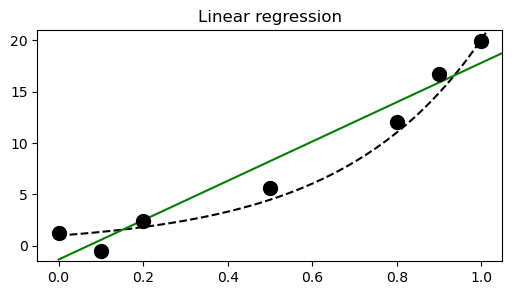

In [8]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(-0.05, 1.05);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

Obviously, the straight line does not fit very well as an approximation. Of course, this is not surprising since our initial function was *nonlinear*. So we try a non-linear model, more precisely with [*polynomial interpolation*](https://en.wikipedia.org/wiki/Polynomial_interpolation). Interestingly, we can still use the *linear regression* method for this, but we have to increase the *dimensionality*. In other words, we consider a polynomial as a *linear combination* of the power functions up to the *degree* $d$ of the polynomial. This gives us $d+1$ *characteristics* that are to be combined linearly to the function value. We are therefore looking for the *coefficients* $a_i, i=1,\dots,d$ of the following form:

$$
p(x) = a_0 + a_1 x^1 + a_2 x^2 + \cdots + a_d x^d
$$

With generally $n$ observations ($n=7$ in our case), we then obtain a (mostly under- or overdetermined) linear system of equations of the form

$$
\left(
\matrix{
1 & x_1 & x_1^2 & \cdots & x_1^d\\
1 & x_2 & x_2^2 & \cdots & x_2^d\\
1 & x_3 & x_3^2 & \cdots & x_3^d\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_n & x_n^2 & \cdots & x_n^d
}
\right) \cdot
\left(
\matrix{ a_0 \\ \vdots \\ a_i \\ \vdots \\ a_d}
\right) =
\left(
\matrix{f_1 \\ \vdots \\ f_k \\ \vdots \\ f_n}
\right)
$$

We then have to solve this "as best we can", i.e. we will try to *minimize* the *error* we make according to certain criteria (usually with the [least squares method](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)).

The approach described corresponds to polynomial interpolation using the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) and `numpy` conveniently has the function `np.vander` ready for this. We try it with polynomials of degree 2 and 5.

Degree 2:  19.88 -0.74 0.0
Degree 5:  -697.66 1776.57 -1555.07 550.93 -56.07 0.0


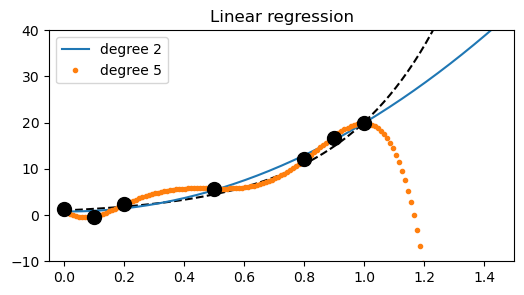

In [9]:
lrp = lm.LinearRegression()  # model
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);  # training
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1)) # prediction
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(-0.05, 1.5);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(f'Degree {deg}: ', ' '.join([str(round(x,2)) for x in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");

A well-known phenomenon can be seen very clearly here: The fifth-degree polynomial is very well adapted to the training data and fits it very accurately; outside the interval $[0,1]$ in which the $x$ values lie, however, the polynomial may be extremely poorly suited (*Note:* If the data was actually randomly generated, then the effect is not always so easily recognizable!) This is referred to as **overfitting**, i.e. such a model is well suited to the training data, but is not up to the actual task of *prediction*.

We can master the problem with another method, the so-called **ridge regression**. The idea here is to **regularize** the **cost function** (more details can be found under the term [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization)).

However, the main focus here is on what is possible with `scikit-learn` in the simplest possible way. First, we could try to find a polynomial that is as suitable as possible for prediction with the help of the class `Ridge` and Trial-and-Error (this would require varying the *regularization parameter*). Fortunately, however, there is also the class (or model) `RidgeCV`, which does this for us with the help of [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

Since `scikit-learn` always trains first using `fit` and then predicts using `predict`, we can find a suitable model by slightly modifying the previous code.

Degree 2:  11.33 7.1 0.0
Degree 5:  2.4 3.07 3.89 4.88 5.33 0.0


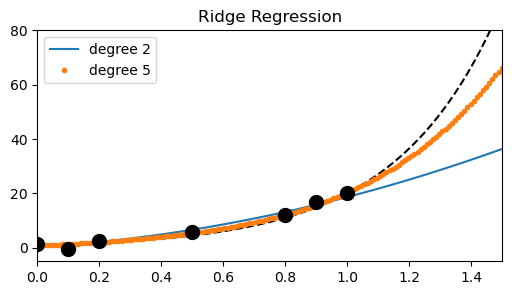

In [11]:
ridge = lm.RidgeCV()  #  another model: Ridge regression with cross-validation
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y);  # training (new)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1)) # prediction (new)
    plt.plot(x_tr, y_ridge, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print(f'Degree {deg}: ', ' '.join([str(round(x,2)) for x in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge Regression");

In fact, you can clearly see here that the quadratic polynomial is **underfitted** (the first-degree polynomial, i.e. our original straight line, was obviously also underfitted). The regularization has effectively counteracted the overfitting here.

## The most important things in brief
---

1. In machine learning, models are adapted to data (*fit*)
2. The model is often used to make predictions (*predict*)
3. Models can be significantly improved using special parameters / variants
4. `scikit-learn` offers a wealth of methods that can be used to create suitable models